In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_biv import additionalplot_solution_1, additionalplot_solution_2

We'll continue to make use of the fuel economy dataset in this workspace.

In [2]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


**Task 1**: Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot. **Hint**: Completing this exercise will take multiple steps! Add additional code cells as needed in order to achieve the goal.

In [3]:
# count car number for all manufactures
fuel_econ.make.value_counts().head()

BMW              523
Mercedes-Benz    269
Porsche          235
Ford             218
Chevrolet        212
Name: make, dtype: int64

In [4]:
# drop off makers produced less 18 cars
fuel_econ1 = fuel_econ.copy()
rv_makes = ['Genesis', 'Aston Martin', 'Suzuki','Lotus','Roush Performance','Alfa Romeo','Karma']
fuel_econ1 = fuel_econ1.query('make not in @rv_makes') # remove the makers with less 18 cars from the df
fuel_econ1.make.value_counts().tail()

Rolls-Royce    42
Maserati       39
Scion          27
Fiat           26
Ferrari        23
Name: make, dtype: int64

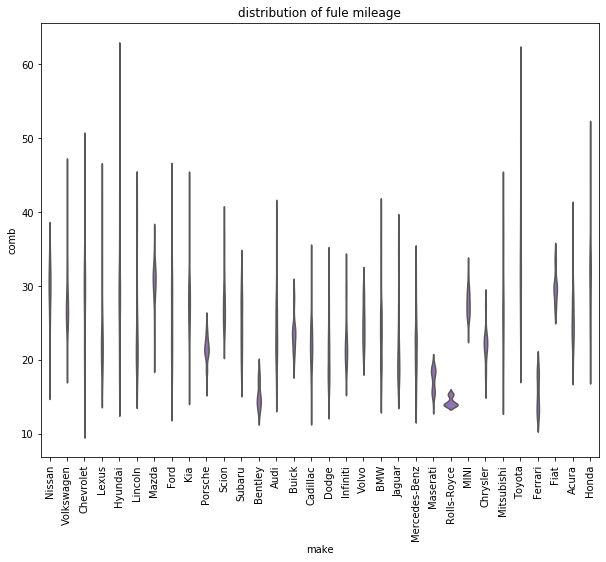

In [5]:
# make a regplot with seaborn
plt.figure(figsize=[10, 8])
sb_color = sb.color_palette()[4]
sb.violinplot(data=fuel_econ1, x='make', y='comb', color=sb_color, inner=None)
plt.title('distribution of fule mileage')
plt.xticks(rotation=90);

In [6]:
group_means = fuel_econ1.groupby(['make']).mean()
group_order = group_means.sort_values(['comb'], ascending=False).index

#### *Issue*: duo the larger number of manufacturers to plot, I've gone with a faceted plot of violin plots rather than assemble a single figure.

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


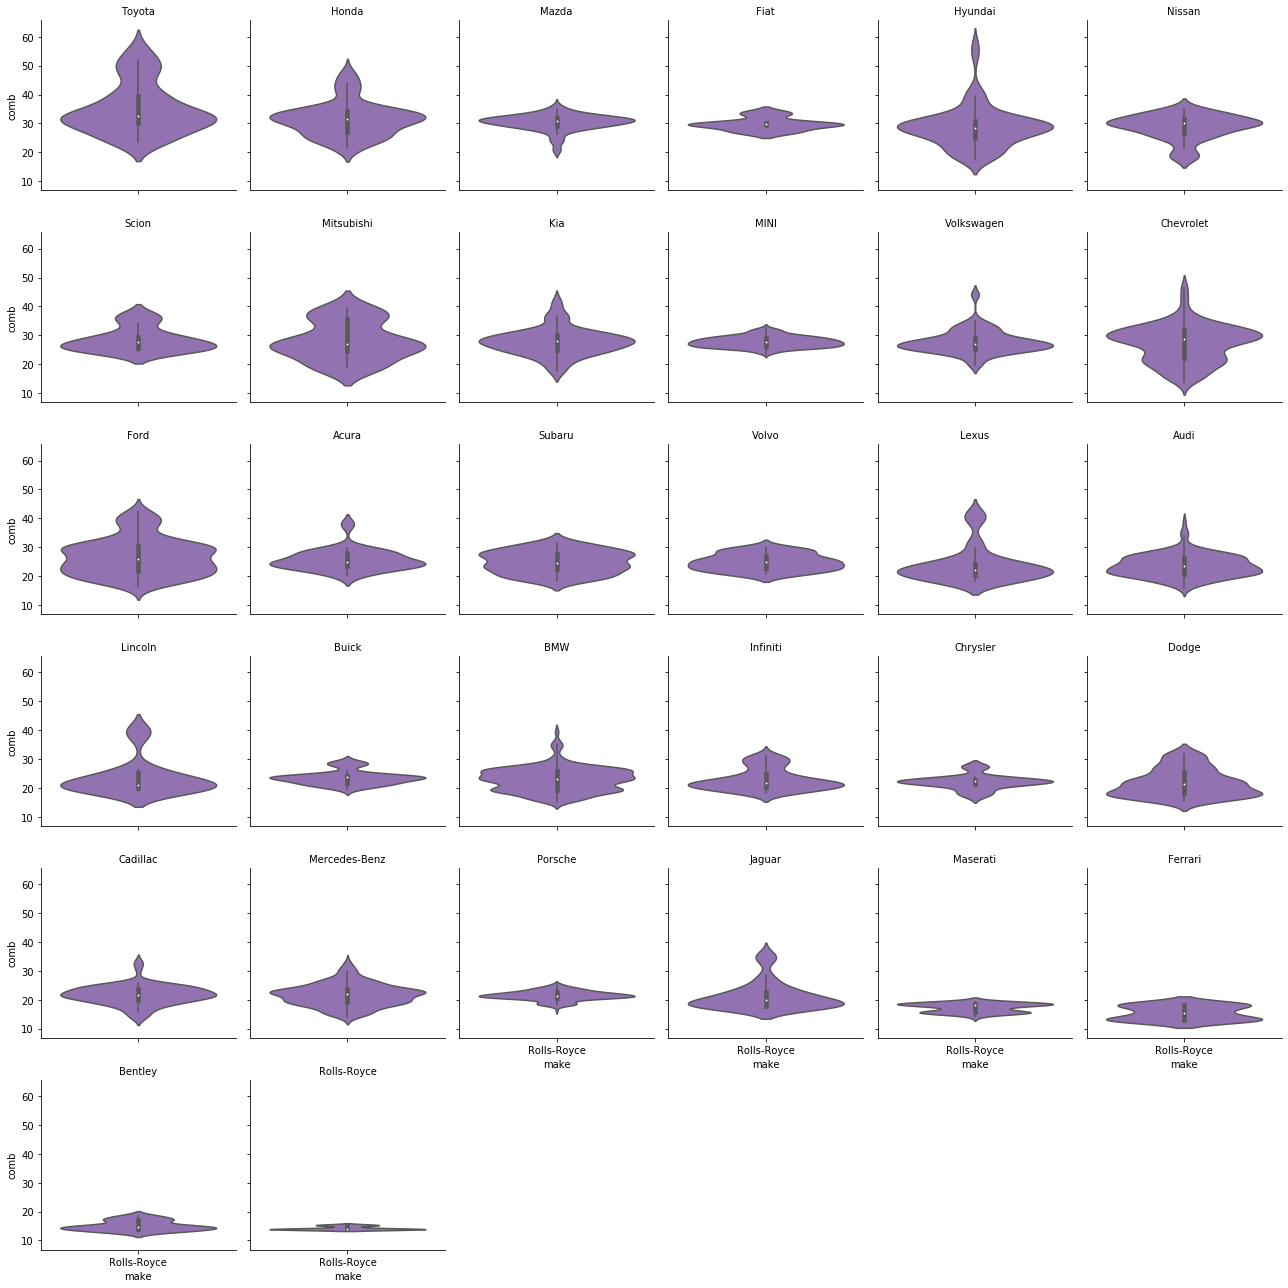

In [7]:
# sort the facets by group mean ('col_order')
group_means = fuel_econ1.groupby(['make']).mean()
group_order = group_means.sort_values(['comb'], ascending=False).index

# setup instance of facetGrid object, define the size of each facet 2 inch and sort the facet by order
g = sb.FacetGrid(data = fuel_econ1, col = 'make', col_wrap=6, height=3, col_order=group_order)

# use map method on facegrid to specify the plot type and variables that will be plotted in each subset
sb_color = sb.color_palette()[4]
g.map(sb.violinplot, 'make', 'comb', color = sb_color, inner = 'box', sharey = False)
g.set_titles('{col_name}');

<h3 align="center">Create a ridgeline plot</h3>

- change "col" to "row"; remove "col_wrap"
- The "size" and "aspect" adjusted for the large vertical stacking of facets
- The `map` function changes to `kdeplot` and removes "bins", adding the `shade` parameter in its place

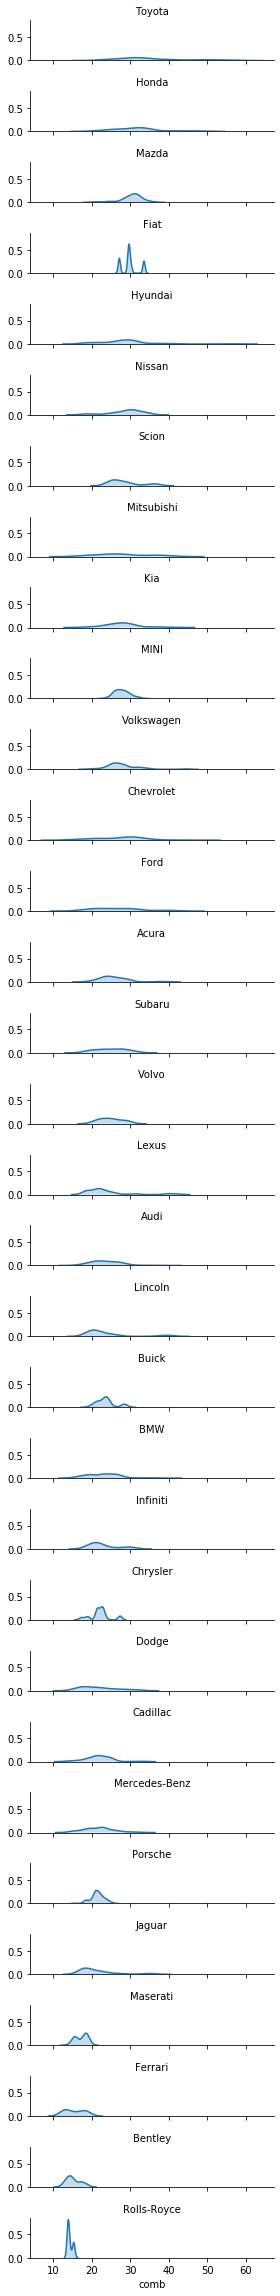

In [8]:
g1 = sb.FacetGrid(data = fuel_econ1, row = 'make', height = 1, aspect = 4,
                 row_order = group_order)
g1.map(sb.kdeplot, 'comb', shade = True)
g1.set_titles('{row_name}');

#### Adjust the ridgeplot to create some overlap between the individual subplots
- "gridspec_kws" parameter to the `FacetGrid` call to adjust the arrangement of subplots in the grid through Matplotlib's `GridSpec` class. By setting "hspec" to a negative value, the subplot axes bounds will overlap vertically. The "size" and "aspect" parameters have also been adjusted.
- add some code on the `FacetGrid` object to remove the y-axis through the despine method and remove the ticks through the set method. 

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout()


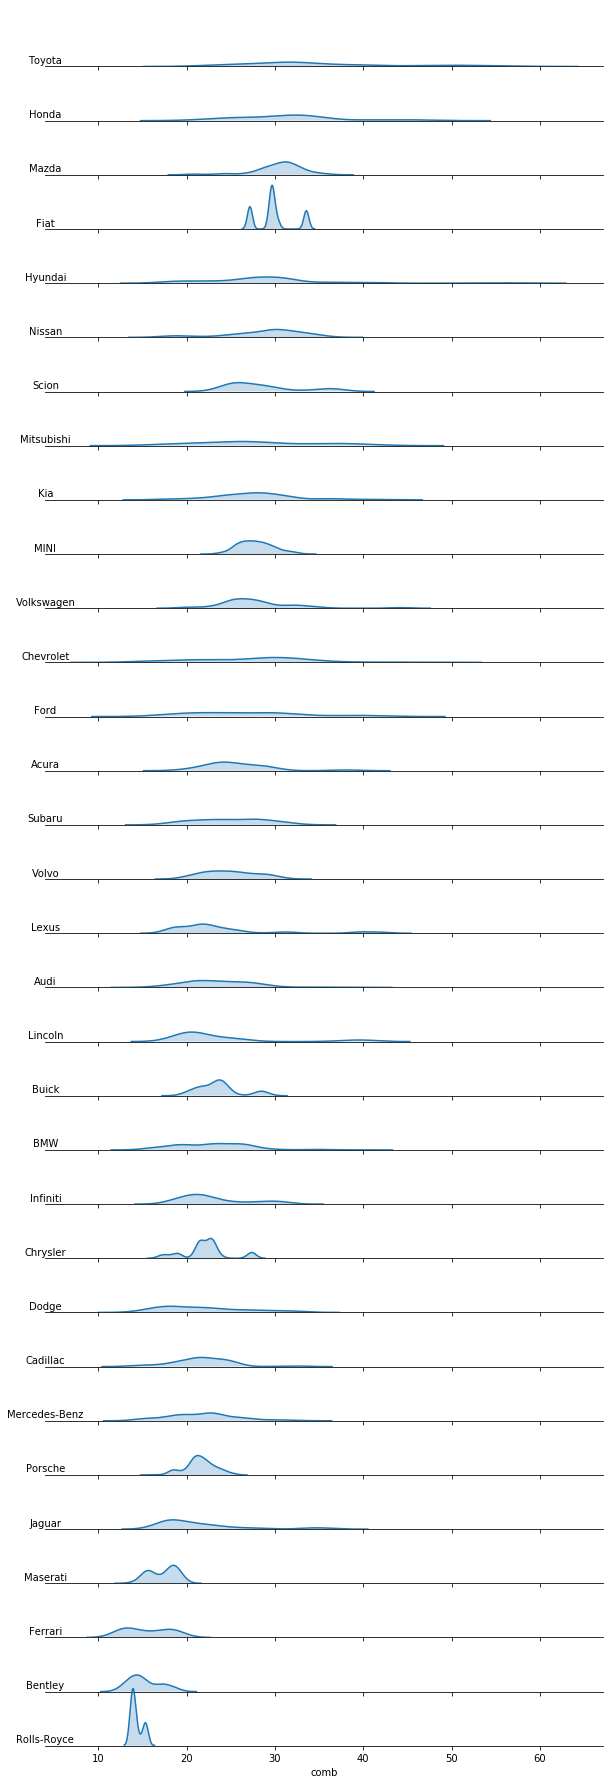

In [9]:
g2 = sb.FacetGrid(data = fuel_econ1, row = 'make', height = 1, aspect = 10,
                 row_order = group_order, gridspec_kws = {'hspace' : -0.1});
g2.map(sb.kdeplot, 'comb', shade = True)

# remove the y-axes
g2.set(yticks=[])
g2.despine(left=True)

g2.set_titles('{row_name}');

# set the transparency of each subplot to full
g2.map(lambda **kwargs: plt.gca().patch.set_alpha(0))

# remove subplot titles and write in new labels
def label_text(x, **kwargs):
    plt.text(4, 0.02, x.iloc[0], ha = 'center', va = 'bottom')
g2.map(label_text, 'make')
g2.set_xlabels('comb')
g2.set_titles('');

Due to the large number of manufacturers to plot, I've gone with a faceted plot of histograms rather than a single figure like a box plot. As part of setting up the FacetGrid object, I have sorted the manufacturers by average mileage, and wrapped the faceting into a six column by three row grid. One interesting thing to note is that there are a very large number of BMW cars in the data, almost twice as many as the second-most prominent maker, Mercedes-Benz. One possible refinement could be to change the axes to be in terms of relative frequency or density to normalize the axes, making the less-frequent manufacturers easier to read.


/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


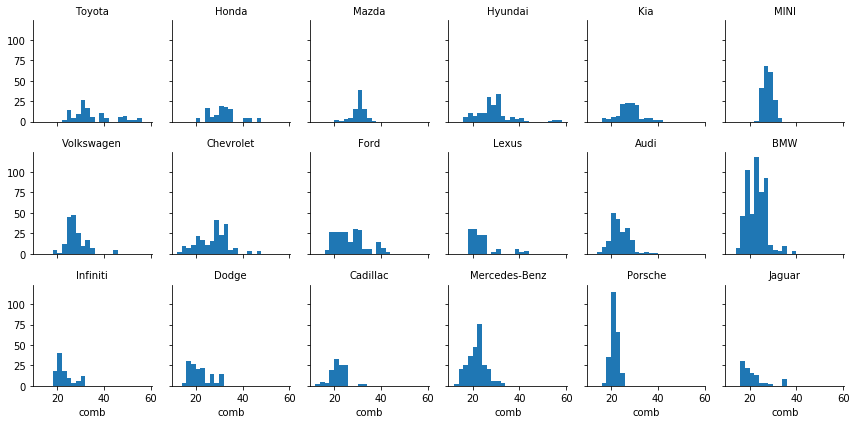

In [10]:
# run this cell to check your work against ours
additionalplot_solution_1()